# Loan Application Status Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## EDA

In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### The NaN values in categerical columns should be replaced with mode and continuous with mean or median.

In [6]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [7]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

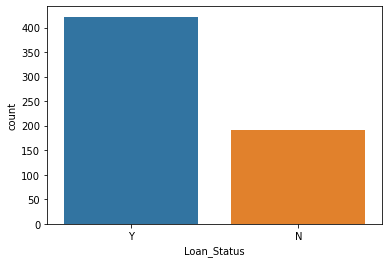

In [8]:
sns.countplot(df['Loan_Status'])

### There is a class imbalance in the output.

<AxesSubplot:xlabel='Gender', ylabel='count'>

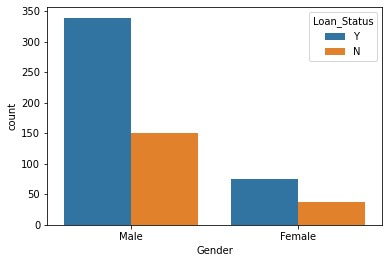

In [9]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])

### There are more male applicants.

<AxesSubplot:xlabel='Married', ylabel='count'>

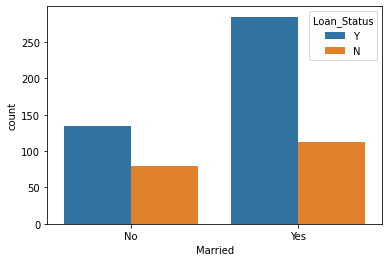

In [10]:
sns.countplot(df['Married'],hue=df['Loan_Status'])

###  There is more chance for unmarried applicants to get loan.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

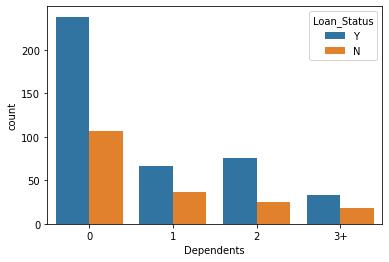

In [11]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])

### There is more chance for independents to get a loan.

<AxesSubplot:xlabel='Education', ylabel='count'>

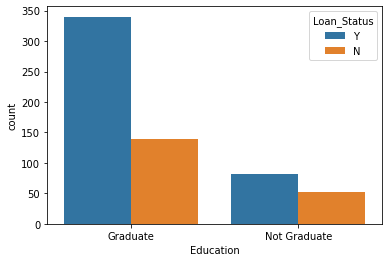

In [12]:
sns.countplot(df['Education'],hue=df['Loan_Status'])

### There is a good chance for graduates to get a loan.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

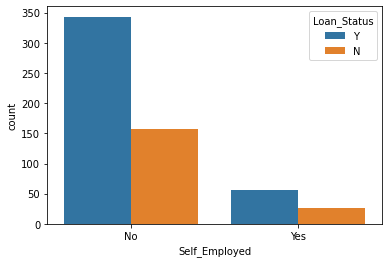

In [13]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

### There is no significant relationship between loan status and their employement.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

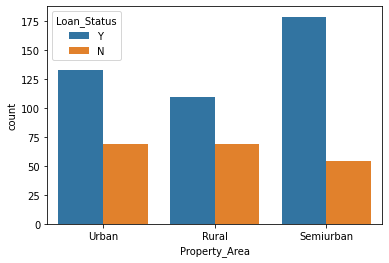

In [14]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

### There is a good chance for Urban and Semi Urban applicants to get loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

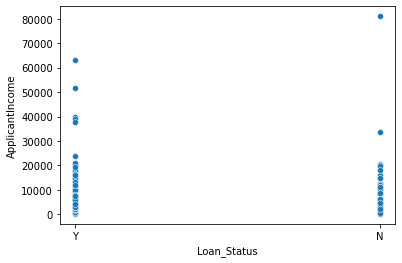

In [15]:
sns.scatterplot(x=df['Loan_Status'],y=df['ApplicantIncome'])

### There is a slight chance of getting loan for applicants with good income.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

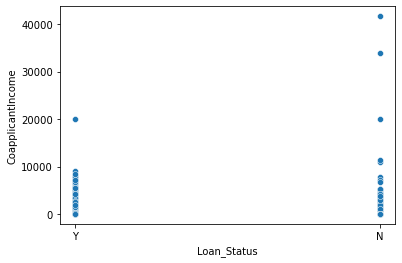

In [16]:
sns.scatterplot(x=df['Loan_Status'],y=df['CoapplicantIncome'])

### There is no significant relation between Coapplicant Income and Loan Status.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

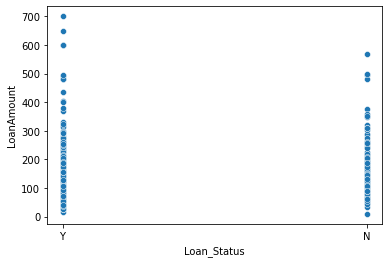

In [17]:
sns.scatterplot(x=df['Loan_Status'],y=df['LoanAmount'])

### There is a good of getting loan for higher loan amount.

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

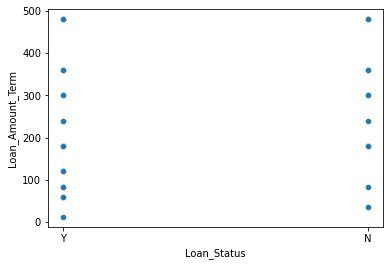

In [18]:
sns.scatterplot(x=df['Loan_Status'],y=df['Loan_Amount_Term'])

### There is no significant relation between loan status and loan amount term.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

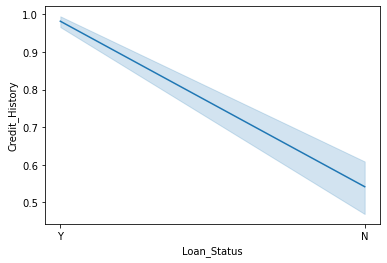

In [19]:
sns.lineplot(x=df['Loan_Status'],y=df['Credit_History'])

### Higher the Credit History, There is more probability of getting Loan.

In [20]:
t=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
cat=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

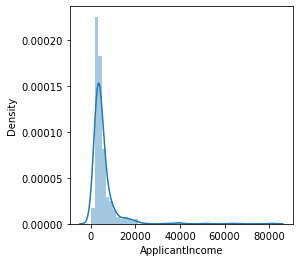

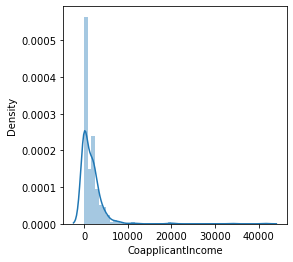

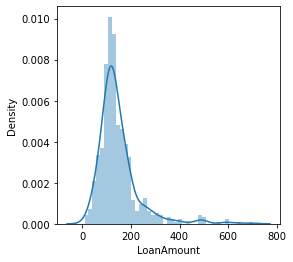

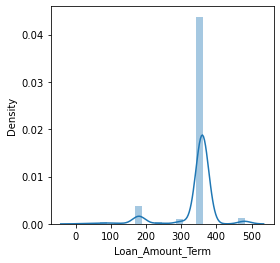

In [21]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])

### There is skewness present in the data wnd Loan_amount_term is not normally distributed.

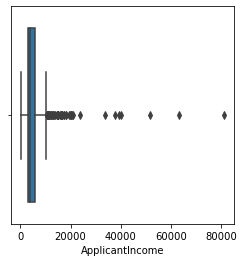

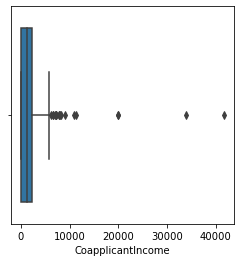

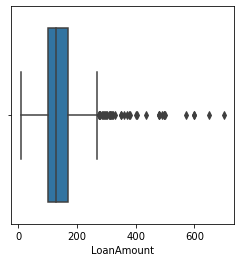

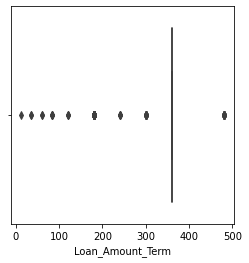

In [22]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### There are outliers present in all columns.

In [23]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Removing Outliers

In [26]:
for i in t:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = df[(df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR)]
    
    fare_mean = df[i].mean()
    fare_std = df[i].std()
    low= fare_mean -(3 * fare_std)
    high= fare_mean + (3 * fare_std)
    fare_outliers = df[(df[i] < low) | (df[i] > high)]
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

### Instead of eliminating the outliers, we have replaced the outliers higher than the upper whisker by the value of upper whisker and the outliers lower than the lower whisker by the value of lower whisker.

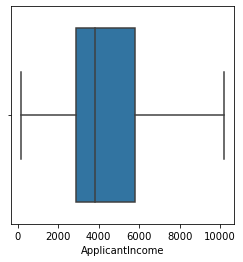

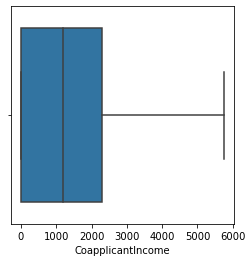

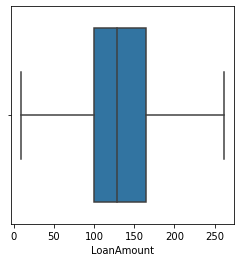

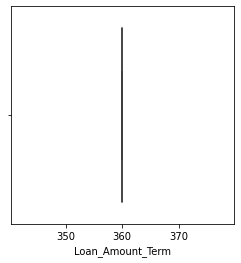

In [27]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### Outliers have been succesfully removed from the data.

## Skewness 

In [28]:
df.skew()

ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.648627
Loan_Amount_Term     0.000000
Credit_History      -2.021971
dtype: float64

In [29]:
from sklearn.preprocessing import PowerTransformer
s=['ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History']
pt = PowerTransformer(method = 'yeo-johnson')
for i in s:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))[:,0]

## Encoding

In [32]:
cate=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in cate:
    df[i]=lab.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.671637,-1.105609,0.251126,360.0,0.411733,2,1
1,LP001003,1,1,1,0,0,0.192328,0.759396,-0.078305,360.0,0.411733,0,0
2,LP001005,1,1,0,0,1,-0.584622,-1.105609,-1.417134,360.0,0.411733,2,1
3,LP001006,1,1,0,1,0,-0.843059,0.905012,-0.228896,360.0,0.411733,2,1
4,LP001008,1,0,0,0,0,0.723142,-1.105609,0.156584,360.0,0.411733,2,1


In [35]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [37]:
x.drop(['Loan_ID'],axis=1,inplace=True)

### This column is not necesary for prediction.

## Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.671637,-1.105609,0.251126,0.0,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.192328,0.759396,-0.078305,0.0,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.584622,-1.105609,-1.417134,0.0,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.843059,0.905012,-0.228896,0.0,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.723142,-1.105609,0.156584,0.0,0.411733,1.223298


<AxesSubplot:>

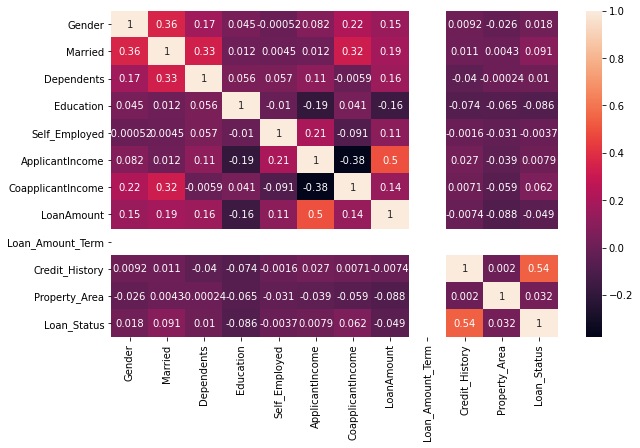

In [39]:
cor=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

## VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['col']=x.columns
vif

,vif,col
0,1.206458,Gender
1,1.389788,Married
2,1.174733,Dependents
3,1.068889,Education
4,1.049084,Self_Employed
5,1.935566,ApplicantIncome
6,1.606229,CoapplicantIncome
7,1.637094,LoanAmount
8,NaN,Loan_Amount_Term
9,1.009226,Credit_History


### Here for all the columns, VIF score is less than 5. Therefore, Multi-Collinearity in data is removed.

## Sampling

In [41]:
from imblearn.over_sampling import SMOTE
smo=SMOTE()
x,y=smo.fit_resample(x,y)

In [42]:
y.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

## Choosing Random Variable

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
maxac=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    sam=DecisionTreeClassifier()
    sam.fit(x_train,y_train)
    pred=sam.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxran=i
print('max accuracy=',maxac,'ran state=',maxran)

max accuracy= 0.8284023668639053 ran state= 116


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxran)

## Model Selection

### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
dtc_clas1=classification_report(y_test,pred1)
acc1=accuracy_score(y_test,pred1)
print(acc1)
print(dtc_clas1)

0.8047337278106509
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        85
           1       0.84      0.75      0.79        84

    accuracy                           0.80       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.81      0.80      0.80       169



In [47]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(y_test,pred1)
con1

array([[73, 12],
       [21, 63]], dtype=int64)

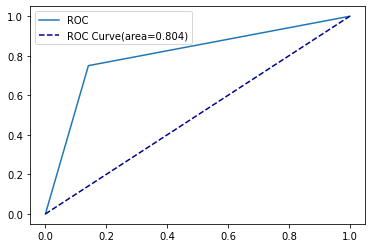

In [48]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds =roc_curve(y_test, pred1)
area_under_curve=roc_auc_score(y_test, pred1)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred2=rfc.predict(x_test)
rfc_clas2=classification_report(y_test,pred2)
acc2=accuracy_score(y_test,pred2)
print(acc2)
print(rfc_clas2)

0.834319526627219
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        85
           1       0.82      0.86      0.84        84

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169



In [50]:
con2=confusion_matrix(y_test,pred2)
con2

array([[69, 16],
       [12, 72]], dtype=int64)

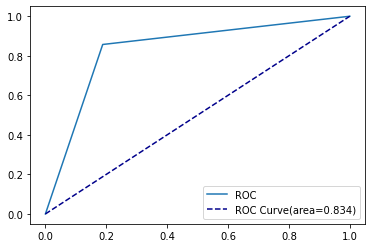

In [51]:
fpr, tpr, thresholds =roc_curve(y_test, pred2)
area_under_curve=roc_auc_score(y_test, pred2)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### Support Vectors Classifier

In [61]:
from sklearn.svm import SVC
sup=SVC()
sup.fit(x_train,y_train)
pred3=sup.predict(x_test)
sv_clas3=classification_report(y_test,pred3)
acc3=accuracy_score(y_test,pred3)
print(acc3)
print(sv_clas3)

0.7514792899408284
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        85
           1       0.71      0.83      0.77        84

    accuracy                           0.75       169
   macro avg       0.76      0.75      0.75       169
weighted avg       0.76      0.75      0.75       169



In [62]:
con3=confusion_matrix(y_test,pred3)
con3

array([[57, 28],
       [14, 70]], dtype=int64)

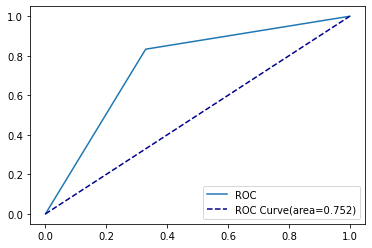

In [63]:
fpr, tpr, thresholds =roc_curve(y_test, pred3)
area_under_curve=roc_auc_score(y_test, pred3)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

### KNN Regression

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)
pred4=knn1.predict(x_test)
sv_clas4=classification_report(y_test,pred4)
acc4=accuracy_score(y_test,pred4)
print(acc4)
print(sv_clas4)

0.7988165680473372
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        85
           1       0.83      0.75      0.79        84

    accuracy                           0.80       169
   macro avg       0.80      0.80      0.80       169
weighted avg       0.80      0.80      0.80       169



In [65]:
con4=confusion_matrix(y_test,pred4)
con4

array([[72, 13],
       [21, 63]], dtype=int64)

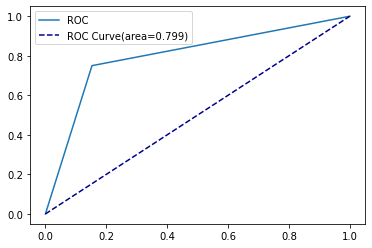

In [66]:
fpr, tpr, thresholds =roc_curve(y_test, pred4)
area_under_curve=roc_auc_score(y_test, pred4)
# Printing ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
cv1=cross_val_score(dtc,x,y,cv=5).mean()
cv2=cross_val_score(rfc,x,y,cv=5).mean()
cv3=cross_val_score(sup,x,y,cv=5).mean()
cv4=cross_val_score(knn1,x,y,cv=5).mean()
print(cv1,cv2,cv3,cv4)

0.7619047619047619 0.821167934629473 0.7227951535643842 0.7370174697097774


In [70]:
print((acc1-cv1),(acc2-cv2),(acc3-cv3),(acc4-cv4))

0.04282896590588903 0.01315159199774596 0.02868413637644418 0.06179909833755981


### We can choose Random Forest Classifier as our model since its cv_score and accuracy score are almost similar.

## Hyper Parameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV
parameters={'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2,3,4,5,6,7,8,9],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
gsc=GridSearchCV(rfc,parameters)
gsc.fit(x_train,y_train)
print(gsc.best_params_)

{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}


In [78]:
fin_loan_model=RandomForestClassifier(bootstrap=True,max_depth=110,max_features=3,min_samples_split=8,min_samples_leaf=4,
                                     n_estimators=200)
fin_loan_model.fit(x_train,y_train)
pred5=fin_loan_model.predict(x_test)
sv_acc=accuracy_score(y_test,pred5)
print("Final_Accuracy:",sv_acc*100)

Final_Accuracy: 83.4319526627219


In [79]:
con5=confusion_matrix(y_test,pred5)
con5

array([[67, 18],
       [10, 74]], dtype=int64)

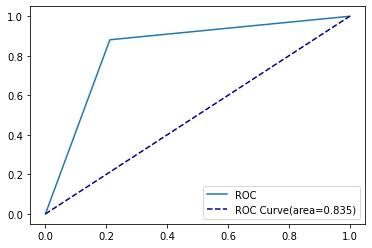

In [80]:
fpr, tpr, thresholds =roc_curve(y_test, pred5)
area_under_curve=roc_auc_score(y_test, pred5)
# Print ROC curve
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(area=%0.3f)'%area_under_curve)
plt.legend()
plt.show()

## Saving the Model

In [81]:
import joblib
joblib.dump(fin_loan_model,'Final_loan_mod.pkl')

['Final_loan_mod.pkl']